<a href="https://colab.research.google.com/github/iampragyagupta/Deep-Learning-for-Computer-Vision/blob/main/DLCV_ActionVOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


**---------------------------------------------------------DATA PREPROCESSING---------------------------------------------------------**

listing Dataset Content

In [ ]:
import os

dataset_path = '/content/drive/MyDrive/Release'
print("Listing contents of dataset:")
print(os.listdir(dataset_path))

Listing contents of dataset:
['videoset.csv', '.DS_Store', '._.DS_Store', 'README', 'a2d_sentences.txt', 'clips320H', 'Annotations', 'train_human_only.csv', 'test_human_only.csv', 'resized_clips', 'resized_clips_test', 'pre-trained', 'output_masks', 'expression_file.json', 'expression_file_modified.json', 'frames_train']


Checking contents of csv file that holds video clip information

In [ ]:
import pandas as pd
from google.colab import files


excel_sheet = "/content/drive/MyDrive/Release/videoset.csv"
df = pd.read_csv(excel_sheet)
human_df = df[df.iloc[:, 1].isin([11, 12, 13, 15, 16, 17, 18, 19, 21, 22, 25, 26, 28, 29])]
print(human_df)



      --h5fAKYurM  43  00:00:00  00:00:06  320  568  181  3  0
1     -1L1Fm8QaK4  11  00:00:41  00:00:45  320  566  100  3  0
7     -4KMQsUaSAQ  11  00:00:56  00:01:03  320  568  168  3  1
13    -7EE9T3Z0qk  21  00:00:00  00:00:08  320  568  241  3  1
19    -Bo3qO_HkEQ  26  00:00:26  00:00:30  320  426   40  3  0
21    -EKuFGo77JM  26  00:00:04  00:00:07  320  426   90  3  1
...           ...  ..       ...       ...  ...  ...  ... .. ..
3771  zrNCs-UYnbk  21  00:00:25  00:00:33  320  426  240  3  1
3773  zsEwBtvofqU  18  00:03:02  00:03:05  320  426   75  3  0
3775  zx96iHwPCJs  28  00:00:05  00:00:13  320  426  200  3  0
3776  zxcvHIZ5nbE  13  00:03:38  00:03:45  320  568  210  5  1
3777  zxjk3hCIARI  28  00:00:12  00:00:15  320  426   91  3  1

[1133 rows x 9 columns]


In [ ]:
print(df.columns)  # See actual column names
print(df.iloc[:, 8].unique())  # What values are in column 8?


Index(['--h5fAKYurM', '43', '00:00:00', '00:00:06', '320', '568', '181', '3',
       '0'],
      dtype='object')
[0 1]


In [ ]:
# Training data (column 9 == 0)
train_df = human_df[human_df.iloc[:, 8] == 0]

# Test data (column 9 == 1)
test_df = human_df[human_df.iloc[:, 8] == 1]

print(train_df)
print(test_df)

      --h5fAKYurM  43  00:00:00  00:00:06  320  568  181  3  0
1     -1L1Fm8QaK4  11  00:00:41  00:00:45  320  566  100  3  0
19    -Bo3qO_HkEQ  26  00:00:26  00:00:30  320  426   40  3  0
28    -MYguBhCWSM  16  00:00:02  00:00:05  320  568   90  3  0
30    -RTVlR5FrHw  18  00:00:19  00:00:22  320  568   72  3  0
31    -TeTejh1ebs  11  00:03:55  00:04:01  320  568  150  3  0
...           ...  ..       ...       ...  ...  ...  ... .. ..
3767  zmiTrOLli8Q  28  00:00:11  00:00:19  320  568   87  3  0
3768  zminz5W25AU  28  00:00:00  00:00:06  320  482  145  3  0
3769  zrA9DdG22ss  26  00:00:36  00:00:40  320  568   96  3  0
3773  zsEwBtvofqU  18  00:03:02  00:03:05  320  426   75  3  0
3775  zx96iHwPCJs  28  00:00:05  00:00:13  320  426  200  3  0

[910 rows x 9 columns]
      --h5fAKYurM  43  00:00:00  00:00:06  320  568  181  3  0
7     -4KMQsUaSAQ  11  00:00:56  00:01:03  320  568  168  3  1
13    -7EE9T3Z0qk  21  00:00:00  00:00:08  320  568  241  3  1
21    -EKuFGo77JM  26  00:00:04

Creating train and test data

In [ ]:
train_df.to_csv('/content/drive/MyDrive/Release/train_human_only.csv', index=False)
test_df.to_csv('/content/drive/MyDrive/Release/test_human_only.csv', index=False)

In [ ]:
# Load your filtered DataFrame
csv_path = "/content/drive/MyDrive/Release/train_human_only.csv"  # Update with actual path to your filtered file
df = pd.read_csv(csv_path)

# Extract unique video IDs from the DataFrame
video_ids = set(df.iloc[:, 0].unique())  # Assuming first column has video IDs
print(video_ids)

{'HrX0ohmu1zw', 'Qqtp8tqt-Ik', '6UHK6Z6wsU8', '2Av_6yKYM84', 'DWVM-m9veLo', '07qn-A4ENo8', '_aJOs5B9T-Q', 'qlXKFC-JEOA', '_4JOpIKy0rA', 'fU_7f2dVbBY', 'cmVQgAEn0kk', 'ZmOXCmoLlTI', 'hstjxEt_4UY', 'k9bLUzJwJyc', 'wn-1ZQSum9o', 'DkkKlhBm2ko', 'BDdO27eAINQ', 'M8yFbTyqd2o', 'GQYbAvuszzQ', 'wd8foBefLFU', 'ZA8sDkqzwUs', 'XdJF9gJt-Ds', 'eQ8x1FGkApk', 'Vx2aapmOVc8', 'vmdtUfF8VjQ', 'Bb_V5RNAFTM', 'FbbaAhQQhDU', 'mnaZEGie2Xk', '9AaLoFD4lXU', 'ju7IEuCU1aM', 'vhcgJHWvw8Q', 'F6p8RoNxs84', 'OBC2V9U8dnw', 'tfe6xr2Mbrc', 'mqjTMIdeghU', '6JMh_oA23EU', 'Gc8PVFQXL68', 'hXl5ejuC7nw', 'G0YSBuw3i0g', 'eqyT-SmMVH0', 'XpIpHBgJUGM', 'z06tumze9dc', '9qqWZ057TYs', '0m1O4YzBGyo', 'IDkhRWTzpvY', 'N9ps0I-6fn4', '9fmo85gQsYk', 'G3zjFccIUUU', 'plBUaDcbE_k', 'GOhC4METbBo', 'VBwrgt-SQro', 'THt4AsN2O10', 'raSAG4g5Vac', 'e5LhIQdxCbU', 'USdCfZMAxMc', 'aSyb2wedmBc', 'Wy3SuhEQHVg', 'wm5lOlOixt0', 'xr3iqm91JRc', 'hHmgaAGYmiU', 'xr2StCdq4M0', 'sQfgTw4LuPI', 'IGA-UkHT2bM', 'ub26kLEfphw', 'HMq1u0uJvvY', 'JdvFAmCluR0', 'HUemh6Jn

**Resizing** 854x480 and saving video clips that are required

In [ ]:
import cv2
import os

folder = "/content/drive/MyDrive/Release/clips320H"  #actual video path
output_dir = "/content/drive/MyDrive/Release/resized_clips"

os.makedirs(output_dir, exist_ok=True)
target_size = (854, 480)  # (width, height)

for filename in os.listdir(folder):
    if filename.endswith(".mp4"):
      video_id = os.path.splitext(filename)[0]
      if video_id in video_ids:
          video_path = os.path.join(folder, filename)
          cap = cv2.VideoCapture(video_path)

          fps = cap.get(cv2.CAP_PROP_FPS)
          out_path = os.path.join(output_dir, filename)
          fourcc = cv2.VideoWriter_fourcc(*'mp4v')
          out = cv2.VideoWriter(out_path, fourcc, fps, target_size)

          while True:
              ret, frame = cap.read()
              if not ret:
                  break
              resized = cv2.resize(frame, target_size)
              out.write(resized)

          cap.release()
          out.release()
          print(f"Resized and saved video: {filename}")

Resized and saved video: Jg487VNMIZ0.mp4
Resized and saved video: qIxRXG1uKyM.mp4
Resized and saved video: JfogUZTrJZ4.mp4
Resized and saved video: ub26kLEfphw.mp4
Resized and saved video: DWVM-m9veLo.mp4
Resized and saved video: L2z5d_BOlxI.mp4
Resized and saved video: N9ps0I-6fn4.mp4
Resized and saved video: USdCfZMAxMc.mp4
Resized and saved video: jyRjjZPDy3k.mp4
Resized and saved video: xshyBv0zTUQ.mp4
Resized and saved video: 4QrlPmK4B94.mp4
Resized and saved video: Pd1QvXJS9m4.mp4
Resized and saved video: LjixR_rjxLc.mp4
Resized and saved video: FlnEDpfblyU.mp4
Resized and saved video: M-0N6I5Rss0.mp4
Resized and saved video: 7CBUAxePC0M.mp4
Resized and saved video: Rbh_mFrkxOQ.mp4
Resized and saved video: VVsRowImPNA.mp4
Resized and saved video: wG0dISYToHA.mp4
Resized and saved video: 6UHK6Z6wsU8.mp4
Resized and saved video: kXBFlJJQjcg.mp4
Resized and saved video: UwB7_2hwJzw.mp4
Resized and saved video: ymPJV5D3UlQ.mp4
Resized and saved video: lnPqFq1lIGg.mp4
Resized and save

In [ ]:
import cv2
import os

folder = "/content/drive/MyDrive/Release/clips320H"  #actual video path
output_dir = "/content/drive/MyDrive/Release/resized_clips_test"

os.makedirs(output_dir, exist_ok=True)

target_size = (854, 480)  # (width, height)

for filename in os.listdir(folder):
    if filename.endswith(".mp4"):
      video_id = os.path.splitext(filename)[0]
      if video_id in video_ids:
          video_path = os.path.join(folder, filename)
          cap = cv2.VideoCapture(video_path)

          fps = cap.get(cv2.CAP_PROP_FPS)
          out_path = os.path.join(output_dir, filename)
          fourcc = cv2.VideoWriter_fourcc(*'mp4v')
          out = cv2.VideoWriter(out_path, fourcc, fps, target_size)

          while True:
              ret, frame = cap.read()
              if not ret:
                  break
              resized = cv2.resize(frame, target_size)
              out.write(resized)

          cap.release()
          out.release()
          print(f"Resized and saved video: {filename}")

Resized and saved video: vM9m0sj311s.mp4
Resized and saved video: VDhfvP_s8jw.mp4
Resized and saved video: lGIbG1mUTxs.mp4
Resized and saved video: mQivrBJvtlM.mp4
Resized and saved video: CprtLxsO_OU.mp4
Resized and saved video: _lRJuoI0r5o.mp4
Resized and saved video: JsqyGvEt0_w.mp4
Resized and saved video: S9UvpMZzv0U.mp4
Resized and saved video: JBxNQIVY54Y.mp4
Resized and saved video: 1NrSGmxydbE.mp4
Resized and saved video: ko-Qoos1Eos.mp4
Resized and saved video: VhhPE6-O2_I.mp4
Resized and saved video: 1J67hpI4wOk.mp4
Resized and saved video: o4ePazF3rZw.mp4
Resized and saved video: dQVfzLc1QQg.mp4
Resized and saved video: KoE5HiQi-Js.mp4
Resized and saved video: C08RAUZYWVw.mp4
Resized and saved video: r9bbFG_E7xs.mp4
Resized and saved video: JxlPq-Dlf6M.mp4
Resized and saved video: bJzru8TM0kk.mp4
Resized and saved video: L16abtpWTSI.mp4
Resized and saved video: tk1uyh9PWqk.mp4
Resized and saved video: 6fAkO0STivA.mp4
Resized and saved video: fwO2MF6K3xI.mp4
Resized and save

Checking processed clips information

In [ ]:

def check_video_properties(video_path):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Failed to open {video_path}")
        return

    width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps    = cap.get(cv2.CAP_PROP_FPS)
    frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    duration = frames / fps if fps else 0

    print(f"Video: {os.path.basename(video_path)}")
    print(f"Resolution: {width}x{height}")
    print(f"FPS: {fps}")
    print(f"Total frames: {frames}")
    print(f"Duration: {duration:.2f} sec")
    print("-" * 40)

    cap.release()

# Example usage
original_video = "/content/drive/MyDrive/Release/clips320H/HBRi1Jw2yOU.mp4"
resized_video = "/content/drive/MyDrive/Release/resized_clips/HBRi1Jw2yOU.mp4"

check_video_properties(original_video)
check_video_properties(resized_video)

Video: HBRi1Jw2yOU.mp4
Resolution: 568x320
FPS: 24.0
Total frames: 72
Duration: 3.00 sec
----------------------------------------
Video: HBRi1Jw2yOU.mp4
Resolution: 854x480
FPS: 24.0
Total frames: 72
Duration: 3.00 sec
----------------------------------------


Extracting frames for ActionVOS

In [ ]:
#extracting frames
import cv2
import os

resized_folder = "/content/drive/MyDrive/Release/resized_clips"
frames_output_dir = "/content/drive/MyDrive/Release/frames_train"
os.makedirs(frames_output_dir, exist_ok=True)

for filename in os.listdir(resized_folder):
    if filename.endswith(".mp4"):
        video_id = os.path.splitext(filename)[0]
        video_path = os.path.join(resized_folder, filename)
        cap = cv2.VideoCapture(video_path)

        frame_idx = 0
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            frame_folder = os.path.join(frames_output_dir, video_id)
            os.makedirs(frame_folder, exist_ok=True)
            frame_path = os.path.join(frame_folder, f"{frame_idx:05d}.jpg")
            cv2.imwrite(frame_path, frame)
            frame_idx += 1

        cap.release()
        print(f"Extracted {frame_idx} frames from {filename}")


Extracted 211 frames from Jg487VNMIZ0.mp4
Extracted 151 frames from qIxRXG1uKyM.mp4
Extracted 75 frames from JfogUZTrJZ4.mp4
Extracted 120 frames from ub26kLEfphw.mp4
Extracted 90 frames from DWVM-m9veLo.mp4
Extracted 60 frames from L2z5d_BOlxI.mp4
Extracted 90 frames from N9ps0I-6fn4.mp4
Extracted 180 frames from USdCfZMAxMc.mp4
Extracted 100 frames from jyRjjZPDy3k.mp4
Extracted 90 frames from xshyBv0zTUQ.mp4
Extracted 181 frames from 4QrlPmK4B94.mp4
Extracted 121 frames from Pd1QvXJS9m4.mp4
Extracted 240 frames from LjixR_rjxLc.mp4
Extracted 240 frames from FlnEDpfblyU.mp4
Extracted 120 frames from M-0N6I5Rss0.mp4
Extracted 210 frames from 7CBUAxePC0M.mp4
Extracted 91 frames from Rbh_mFrkxOQ.mp4
Extracted 68 frames from VVsRowImPNA.mp4
Extracted 181 frames from wG0dISYToHA.mp4
Extracted 61 frames from 6UHK6Z6wsU8.mp4
Extracted 120 frames from kXBFlJJQjcg.mp4
Extracted 120 frames from UwB7_2hwJzw.mp4
Extracted 240 frames from ymPJV5D3UlQ.mp4
Extracted 50 frames from lnPqFq1lIGg.mp4
E

In [ ]:
#extracting frames
import cv2
import os

resized_folder = "/content/drive/MyDrive/Release/resized_clips_test"
frames_output_dir = "/content/drive/MyDrive/Release/frames_test"
os.makedirs(frames_output_dir, exist_ok=True)

for filename in os.listdir(resized_folder):
    if filename.endswith(".mp4"):
        video_id = os.path.splitext(filename)[0]
        video_path = os.path.join(resized_folder, filename)
        cap = cv2.VideoCapture(video_path)

        frame_idx = 0
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            frame_folder = os.path.join(frames_output_dir, video_id)
            os.makedirs(frame_folder, exist_ok=True)
            frame_path = os.path.join(frame_folder, f"{frame_idx:05d}.jpg")
            cv2.imwrite(frame_path, frame)
            frame_idx += 1

        cap.release()
        print(f"Extracted {frame_idx} frames from {filename}")


Extracted 150 frames from vM9m0sj311s.mp4
Extracted 240 frames from VDhfvP_s8jw.mp4
Extracted 125 frames from lGIbG1mUTxs.mp4
Extracted 150 frames from mQivrBJvtlM.mp4
Extracted 120 frames from CprtLxsO_OU.mp4
Extracted 120 frames from _lRJuoI0r5o.mp4
Extracted 60 frames from JsqyGvEt0_w.mp4
Extracted 150 frames from S9UvpMZzv0U.mp4
Extracted 180 frames from JBxNQIVY54Y.mp4
Extracted 240 frames from 1NrSGmxydbE.mp4
Extracted 121 frames from ko-Qoos1Eos.mp4
Extracted 211 frames from VhhPE6-O2_I.mp4
Extracted 120 frames from 1J67hpI4wOk.mp4
Extracted 90 frames from o4ePazF3rZw.mp4
Extracted 90 frames from dQVfzLc1QQg.mp4
Extracted 60 frames from KoE5HiQi-Js.mp4
Extracted 180 frames from C08RAUZYWVw.mp4
Extracted 120 frames from r9bbFG_E7xs.mp4
Extracted 100 frames from JxlPq-Dlf6M.mp4
Extracted 150 frames from bJzru8TM0kk.mp4
Extracted 210 frames from L16abtpWTSI.mp4
Extracted 180 frames from tk1uyh9PWqk.mp4
Extracted 192 frames from 6fAkO0STivA.mp4
Extracted 180 frames from fwO2MF6K3xI.

Creating Json File for ActionVOS

In [ ]:
import csv
import json
import os

# === STEP 1: Define the label ID to action map (only valid labels) ===
label_map = {
    11: "adult is climbing",
    12: "adult is crawling",
    13: "adult is eating",
    15: "adult is jumping",
    16: "adult is rolling",
    17: "adult is running",
    18: "adult is walking",
    19: "adult is not doing any action",
    21: "baby is climbing",
    22: "baby is crawling",
    26: "baby is rolling",
    28: "baby is walking",
    29: "baby is not doing any action"
}

# === STEP 2: Set paths ===
csv_path = '/content/drive/MyDrive/Release/train_human_only.csv'
frames_dir = '/content/drive/MyDrive/Release/frames_train'
json_output_path = '/content/drive/MyDrive/Release/expression_file_new.json'

data = []

# === STEP 3: Read CSV and process entries ===
with open(csv_path, 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        # Split the first column on comma
        row[0] = row[0].split(',')
        print(row[0])

        video_id = row[0][0]
        label_id = int(row[0][1])
        if label_id not in label_map:
            continue  # Skip undefined labels

        action_text = label_map[label_id]
        video_frame_dir = os.path.join(frames_dir, video_id)

        # Check if frame directory exists
        if not os.path.isdir(video_frame_dir):
            print(f"⚠️ Warning: Frame directory not found for video: {video_id}")
            continue

        # List and sort frame filenames
        frame_list = sorted([
            f for f in os.listdir(video_frame_dir)
            if f.endswith(".jpg") and not f.startswith(".")
        ])

        if not frame_list:
            print(f"⚠️ Warning: No frames found for {video_id}")
            continue

        # Construct the data structure
        data.append({
            "video": video_id,
            "expressions": [
                {
                    "exp": action_text,
                    "id": label_id,
                    "frames": frame_list
                }
            ]
        })

# === STEP 4: Save to JSON ===
with open(json_output_path, 'w') as f:
    json.dump(data, f, indent=2)

print(f"✅ expression_file.json saved to {json_output_path}")


['--h5fAKYurM', '43', '00:00:00', '00:00:06', '320', '568', '181', '3', '0']
['-1L1Fm8QaK4', '11', '00:00:41', '00:00:45', '320', '566', '100', '3', '0']
['-Bo3qO_HkEQ', '26', '00:00:26', '00:00:30', '320', '426', '40', '3', '0']
⚠️ Warning: Frame directory not found for video: -Bo3qO_HkEQ
['-MYguBhCWSM', '16', '00:00:02', '00:00:05', '320', '568', '90', '3', '0']
⚠️ Warning: Frame directory not found for video: -MYguBhCWSM
['-RTVlR5FrHw', '18', '00:00:19', '00:00:22', '320', '568', '72', '3', '0']
['-TeTejh1ebs', '11', '00:03:55', '00:04:01', '320', '568', '150', '3', '0']
⚠️ Warning: Frame directory not found for video: -TeTejh1ebs
['-UQLalti9dI', '16', '00:00:35', '00:00:38', '320', '428', '90', '3', '0']
⚠️ Warning: Frame directory not found for video: -UQLalti9dI
['-ZG23ZWRtuM', '28', '00:00:33', '00:00:36', '320', '568', '90', '3', '0']
['-aN1E545q_Q', '12', '00:00:06', '00:00:10', '320', '568', '120', '3', '0']
⚠️ Warning: Frame directory not found for video: -aN1E545q_Q
['-dP_5

CLoning ActionVOS into Drive

In [ ]:
%cd /content/drive/MyDrive/
!git clone https://github.com/ut-vision/ActionVOS.git


/content/drive/MyDrive
Cloning into 'ActionVOS'...
remote: Enumerating objects: 83, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 83 (delta 23), reused 76 (delta 16), pack-reused 0 (from 0)
Receiving objects: 100% (83/83), 4.48 MiB | 7.66 MiB/s, done.
Resolving deltas: 100% (23/23), done.


In [ ]:
%cd /content/drive/MyDrive/ActionVOS
!mkdir -p demo_path/JPEGImages_Sparse/val
!mkdir -p demo_path/ImageSets


/content/drive/MyDrive/ActionVOS


Copying content into ActionVOS from Release

In [ ]:
!cp -r /content/drive/MyDrive/Release/frames_train/* demo_path/JPEGImages_Sparse/val/


^C


In [ ]:
!mkdir -p /content/drive/MyDrive/ActionVOS/demo_path/ImageSets
!cp /content/drive/MyDrive/Release/expression_file.json /content/drive/MyDrive/ActionVOS/demo_path/ImageSets/

In [ ]:
%cd /content/drive/MyDrive/ActionVOS/
!git clone https://github.com/wjn922/ReferFormer.git
!cd ReferFormer
!mkdir pretrained_weights


/content/drive/MyDrive/ActionVOS
Cloning into 'ReferFormer'...
remote: Enumerating objects: 317, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 317 (delta 65), reused 47 (delta 47), pack-reused 226 (from 1)
Receiving objects: 100% (317/317), 53.27 MiB | 15.33 MiB/s, done.
Resolving deltas: 100% (147/147), done.
Updating files: 100% (85/85), done.
mkdir: cannot create directory ‘pretrained_weights’: File exists


In [ ]:
!cd ReferFormer
!pip install -r requirements.txt
!pip install 'git+https://github.com/facebookresearch/fvcore'
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
!cd models/ops
!python setup.py build install

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
  Cloning https://github.com/facebookresearch/fvcore to /tmp/pip-req-build-2ceguau_
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/fvcore /tmp/pip-req-build-2ceguau_
  Resolved https://github.com/facebookresearch/fvcore to commit a491d5b9a06746f387aca2f1f9c7c7f28e20bef9
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-zjl6ik8x
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-zjl6ik8x
  Resolved https://github.com/cocodataset/cocoapi.git to commit 8c9bcc3cf640524c4c20a9c40e89cb6a2f2fa0e9
  Preparing metadata (setup.py) ... done
/bin/bash: line 1: cd: models/ops: No such file or directory
python3: can't open file '/content/drive/MyDrive/ActionVOS/setup.py': [Errno 2] No such file or directory


In [ ]:
%cd /content/drive/MyDrive/ActionVOS
!mkdir -p pretrained_weights
!cp /content/drive/MyDrive/Release/pre-trained/actionvos_rf_r101.pth pretrained_weights/


/content/drive/MyDrive/ActionVOS
^C


In [ ]:
%cd /content/drive/MyDrive/ActionVOS/ReferFormer


[Errno 2] No such file or directory: '/content/drive/MyDrive/ActionVOS/ReferFormer'
/content/drive/MyDrive/ActionVOS


In [ ]:
%cd /content/ActionVOS

import sys
# sys.path.append('/content/drive/MyDrive/ActionVOS/Referformer')
sys.path.append('/content/drive/MyDrive/IIT ROPAR/ActionVOS/ReferFormer')





[Errno 2] No such file or directory: '/content/ActionVOS'
/content


Checking for Utils in Referformer

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/ActionVOS/ReferFormer')
# sys.path.append('/content/drive/MyDrive/IITROPAR/ActionVOS/ReferFormer')

import util.misc as utils
print("✔ util.misc imported successfully!")


✔ util.misc imported successfully!


Importing Torch and checking for Cuda Availability

In [ ]:
import torch
print(torch.cuda.is_available())

True


Building build.py for building custom operations for inference

In [ ]:

# !python '/content/drive/MyDrive/IITROPAR/ActionVOS/ReferFormer/models/ops/setup.py' build develop

!python '/content/drive/MyDrive/ActionVOS/ReferFormer/models/ops/setup.py' build develop


running build
running build_py
copying RF_ActionVOS/inference_actionvos.py -> build/lib.linux-x86_64-cpython-311/RF_ActionVOS
running build_ext
/usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:529: UserWarning: Attempted to use ninja as the BuildExtension backend but we could not find ninja.. Falling back to using the slow distutils backend.
  warnings.warn(msg.format('we could not find ninja.'))
/usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:448: UserWarning: The detected CUDA version (12.5) has a minor version mismatch with the version that was used to compile PyTorch (12.4). Most likely this shouldn't be a problem.
  warnings.warn(CUDA_MISMATCH_WARN.format(cuda_str_version, torch.version.cuda))
/usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:458: UserWarning: There are no x86_64-linux-gnu-g++ version bounds defined for CUDA version 12.5
  warnings.warn(f'There are no {compiler_name} version bounds defined for CUDA versio

In [ ]:
!pip install fvcore

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fvcore: filename=fvcore-0.1.5.post20221221-py3-none-any.whl size=61397 sha256=b38e58612c7bc02b02ec8816cb6fe094c7a066b507caa899633b656e7be2ddee
  Stored in directory: /root/.cache/pip/wheels/65/71/95/3b8fde5c65c6e4a806e0867c1651dcc71a1cb2f3430e8f355f
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31527 sha256=d35ccd45a29cd53b2c17340e645364926cb8a3bfa716a86159792171657fd62a
  Stored in directory: /root/.cache/pip/wheels/ba/5e/16/6117f8fe7e9c0c161a795e10d94645ebcf301ccbd01f66d8ec
Successfully built fvcore iopath


Reformatting json file

In [ ]:
import json

# Paths
input_json_path = '/content/drive/MyDrive/IITROPAR/Release/expression_file_new.json'
output_json_path = '/content/drive/MyDrive/IITROPAR/Release/expression_file_formatted.json'

# Load the current list-based JSON
with open(input_json_path, 'r') as f:
    video_list = json.load(f)

# Restructure into expected format
converted_data = {"videos": {}}

for entry in video_list:
    video_id = entry["video"]
    expressions = entry["expressions"]

    # Extract frames from the first expression (assuming all expressions share the same frame list)
    frames = expressions[0]["frames"] if expressions else []

    converted_data["videos"][video_id] = {
        "frames": frames,
        "expressions": expressions
    }

# Save the reformatted JSON
with open(output_json_path, 'w') as f:
    json.dump(converted_data, f, indent=2)

print(f"✅ Reformatted JSON saved to: {output_json_path}")


✅ Reformatted JSON saved to: /content/drive/MyDrive/IITROPAR/Release/expression_file_formatted.json


In [ ]:
import json

# Load the existing JSON file
with open('/content/drive/MyDrive/Release/expression_file.json', 'r') as f:
    data = json.load(f)

# Print the structure of the data to debug
print("Data loaded:", data)
print("Type of data:", type(data))

# Check if data is a list and convert it to a dictionary if needed
if isinstance(data, list):
    data = {"videos": data}

# Now you can check the data structure after modification
print("Modified data:", data)


Data loaded: [{'video': '-1L1Fm8QaK4', 'expressions': [{'exp': 'adult is climbing', 'id': 0}]}, {'video': '-Bo3qO_HkEQ', 'expressions': [{'exp': 'baby is rolling', 'id': 0}]}, {'video': '-MYguBhCWSM', 'expressions': [{'exp': 'adult is rolling', 'id': 0}]}, {'video': '-RTVlR5FrHw', 'expressions': [{'exp': 'adult is walking', 'id': 0}]}, {'video': '-TeTejh1ebs', 'expressions': [{'exp': 'adult is climbing', 'id': 0}]}, {'video': '-UQLalti9dI', 'expressions': [{'exp': 'adult is rolling', 'id': 0}]}, {'video': '-ZG23ZWRtuM', 'expressions': [{'exp': 'baby is walking', 'id': 0}]}, {'video': '-aN1E545q_Q', 'expressions': [{'exp': 'adult is crawling', 'id': 0}]}, {'video': '-dP_5L19sdc', 'expressions': [{'exp': 'adult is crawling', 'id': 0}]}, {'video': '-gLdLiByqTY', 'expressions': [{'exp': 'baby is climbing', 'id': 0}]}, {'video': '-jR_xfZwFNM', 'expressions': [{'exp': 'adult is running', 'id': 0}]}, {'video': '-or3GptmdFI', 'expressions': [{'exp': 'adult is rolling', 'id': 0}]}, {'video': '-

Creating Palette imag and storing it

In [ ]:
from PIL import Image

def create_palette_image():
    # Create a new image with mode 'P' (palette-based) and size 256x1
    palette_img = Image.new('P', (256, 1))

    # Generate a palette: 256 colors (R, G, B values)
    palette = []
    for i in range(256):
        # Example: color pattern using modulo to get variety
        r = (i * 5) % 256
        g = (i * 3) % 256
        b = (i * 7) % 256
        palette.extend((r, g, b))

    # Fill the rest if less than 768 entries (256 * 3)
    palette += [0] * (768 - len(palette))

    # Apply palette
    palette_img.putpalette(palette)

    # Save the palette image
    palette_img.save('/content/drive/MyDrive/Release/Annotations/palette.png')
    print("Palette image saved as 'color_palette.png'")

create_palette_image()


Palette image saved as 'color_palette.png'


Inference on backbone and pretrained weights of VISOR

In [ ]:
%cd /content/drive/MyDrive/ActionVOS
sys.path.append('/content/drive/MyDrive/ActionVOS/ReferFormer')
!python3 RF_ActionVOS/inference_actionvos.py \
  --dataset_file actionvos \
  --resume /content/drive/MyDrive/Release/pre-trained/checkpoint.pth \
  --expression_file /content/drive/MyDrive/Release/single_video.json \
  --output_dir /content/drive/MyDrive/Release/output_masks \
  --backbone resnet101 \
  --use_positive_cls \
  --pos_cls_thres 0.05 \
  --split test \
  --device cuda \
  --actionvos_path /content/drive/MyDrive/Release/frames_train

/content/drive/MyDrive/ActionVOS
2025-05-13 18:25:15.365541: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747160715.385648   38402 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747160715.391888   38402 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-13 18:25:15.412356: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Inference only supports for batch size = 1
Start inference
processor 0:   0% 0/1 [00:00<?, ?

Inference on Backbone of A2D

In [ ]:
%cd /content/drive/MyDrive/ActionVOS
sys.path.append('/content/drive/MyDrive/ActionVOS/ReferFormer')
!python3 RF_ActionVOS/inference_actionvos.py \
  --dataset_file a2d \
  --resume /content/drive/MyDrive/Release/pre-trained/checkpoint.pth \
  --expression_file /content/drive/MyDrive/Release/single_video1.json \
  --output_dir /content/drive/MyDrive/Release/output_masks \
  --backbone video_swin_b_p4w7 \
  --use_positive_cls \
  --pos_cls_thres 0.05 \
  --split test \
  --device cuda \
  --masks \
  --actionvos_path /content/drive/MyDrive/Release/frames_train



/content/drive/MyDrive/ActionVOS
2025-05-14 09:23:06.637491: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747214586.658673   64167 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747214586.664900   64167 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-14 09:23:06.685647: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Inference only supports for batch size = 1
Start inference
processor 0:   0% 0/1 [00

Comparing original frames with mask frames generated

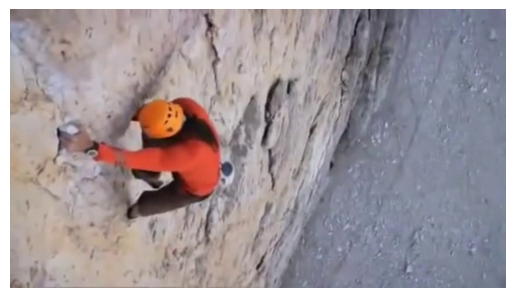

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = '/content/drive/MyDrive/Release/frames_train/JPEGImages_Sparse/test/-1L1Fm8QaK4/00027.jpg'
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axes for better visualization
plt.show()


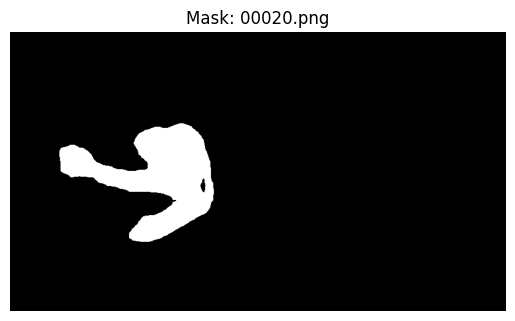

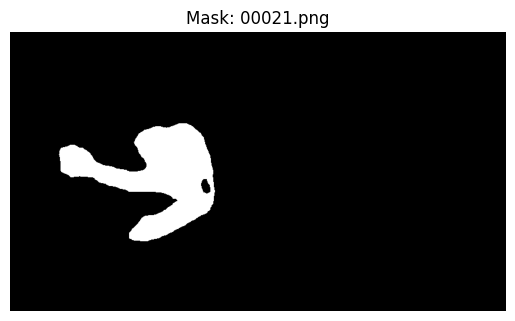

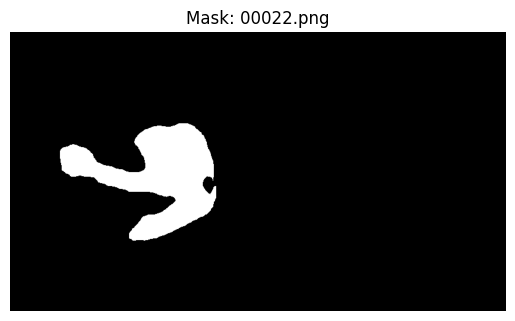

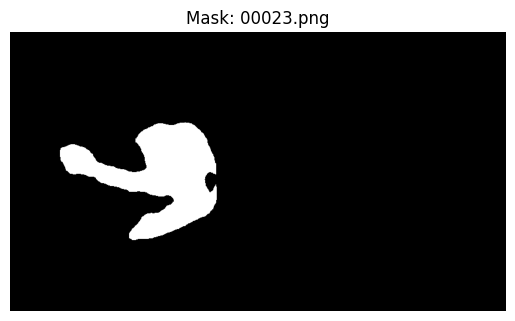

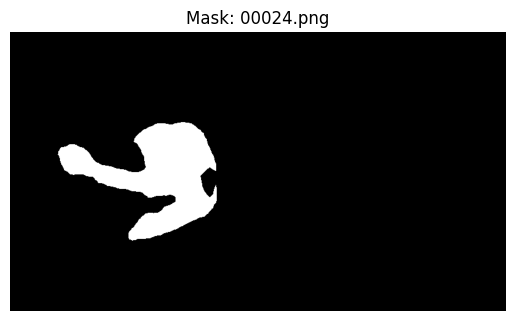

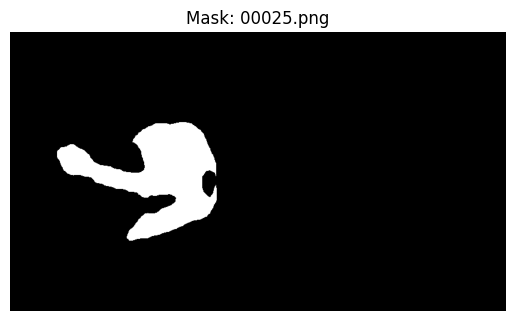

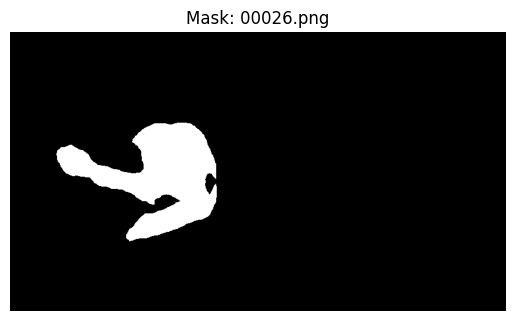

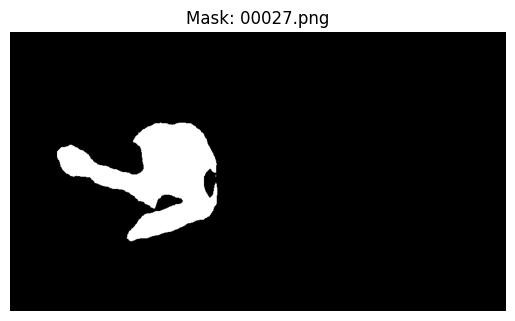

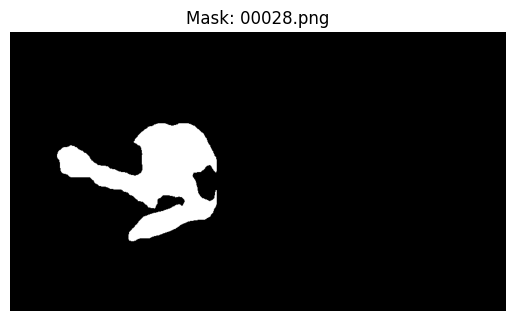

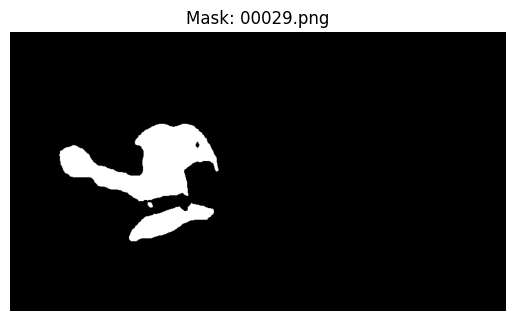

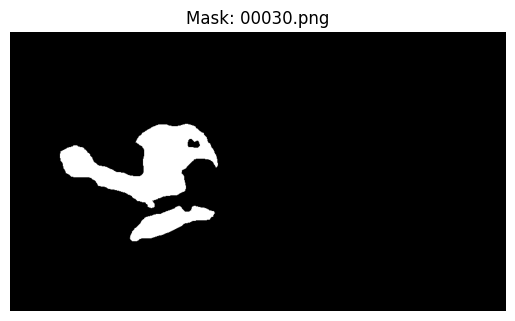

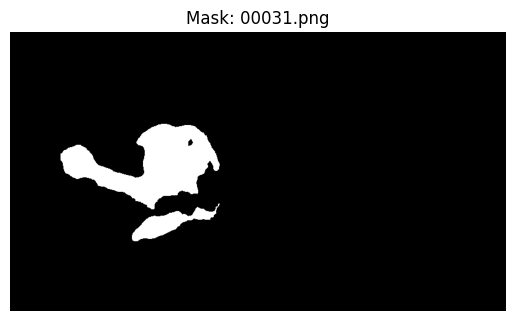

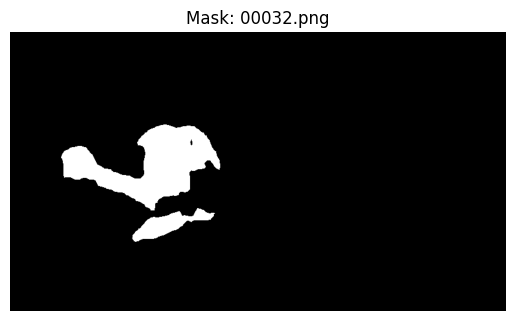

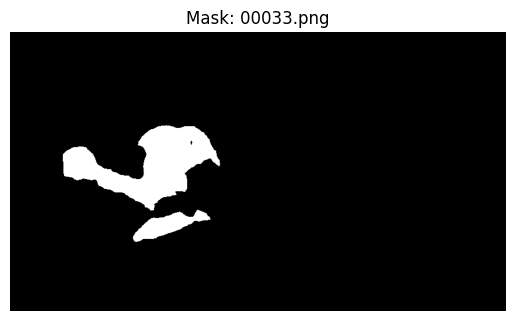

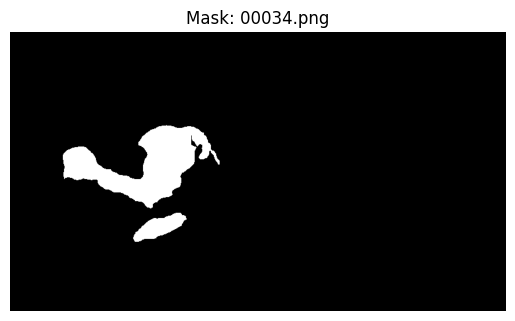

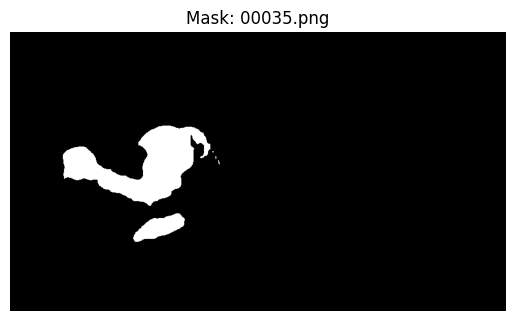

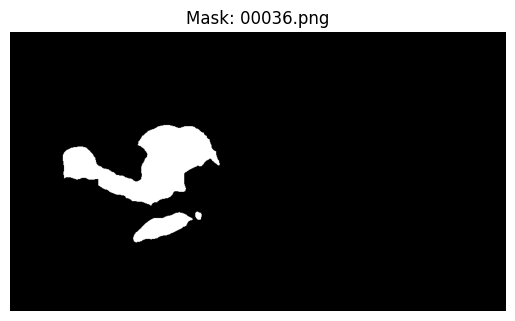

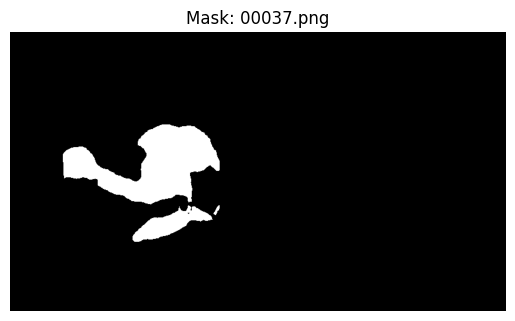

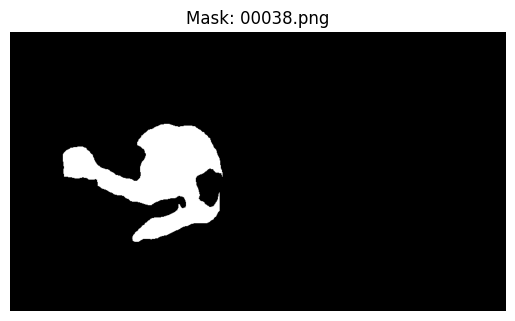

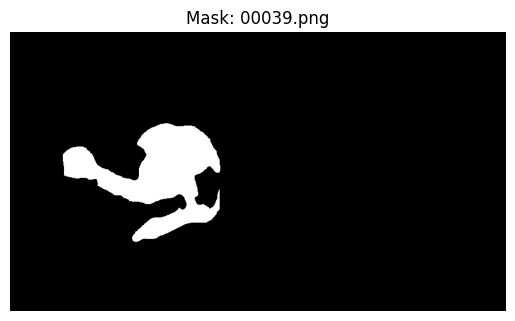

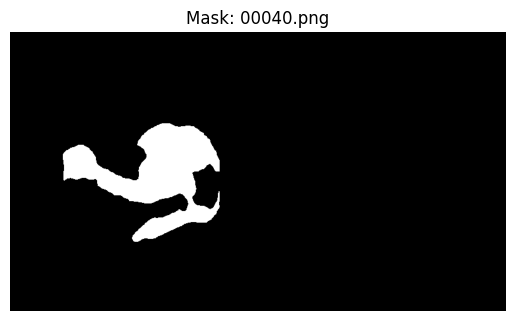

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

# Path to predicted masks for one video
mask_folder = "/content/drive/MyDrive/Release/output_masks/test/-1L1Fm8QaK4"

# Get sorted list of all PNG files
mask_files = sorted([f for f in os.listdir(mask_folder) if f.endswith('.png')])

# Loop over and display each mask
for mask_file in mask_files:
    mask_path = os.path.join(mask_folder, mask_file)
    mask = Image.open(mask_path)
    mask_np = np.array(mask)

    plt.imshow(mask_np, cmap='gray')
    plt.title(f'Mask: {mask_file}')
    plt.axis('off')
    plt.show()


Increasing contrast of mask frames and resaving

In [ ]:
from PIL import Image
import numpy as np
import os

input_dir = "/content/drive/MyDrive/Release/output_masks/test/-1L1Fm8QaK4"
output_dir = "/content/drive/MyDrive/Release/output_masks/contrast_enhanced/-1L1Fm8QaK4"
os.makedirs(output_dir, exist_ok=True)

for file in sorted(os.listdir(input_dir)):
    if file.endswith(".png"):
        path = os.path.join(input_dir, file)
        mask = Image.open(path)
        mask_np = np.array(mask)

        # Enhance: make all nonzero values to 255
        enhanced_mask = np.where(mask_np > 0, 255, 0).astype(np.uint8)

        # Save enhanced image
        output_path = os.path.join(output_dir, file)
        Image.fromarray(enhanced_mask).save(output_path)

print(f"Contrast-enhanced masks saved to: {output_dir}")


Contrast-enhanced masks saved to: /content/drive/MyDrive/Release/output_masks/contrast_enhanced/-1L1Fm8QaK4


Converting mask frames into video

In [ ]:
import cv2

# Directory to save highlighted frames
highlighted_dir = "/content/drive/MyDrive/Release/output_masks/contrast_enhanced/-1L1Fm8QaK4"
os.makedirs(highlighted_dir, exist_ok=True)
# === Now create a video from saved highlighted frames ===
output_video_path = "/content/drive/MyDrive/Release/output_masks/mask_vid/-1L1Fm8QaK4.mp4"
highlighted_files = sorted([f for f in os.listdir(highlighted_dir) if f.endswith(('.jpg', '.png'))])
print(highlighted_files)
# Read first frame to get size
sample_frame = cv2.imread(os.path.join(highlighted_dir, highlighted_files[0]))
height, width, _ = sample_frame.shape
fps = 5  # Change as needed

# Initialize video writer
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

for f in highlighted_files:
    frame = cv2.imread(os.path.join(highlighted_dir, f))
    out.write(frame)

out.release()
print(f"Video saved at: {output_video_path}")

['00020.png', '00021.png', '00022.png', '00023.png', '00024.png', '00025.png', '00026.png', '00027.png', '00028.png', '00029.png', '00030.png', '00031.png', '00032.png', '00033.png', '00034.png', '00035.png', '00036.png', '00037.png', '00038.png', '00039.png', '00040.png']
Video saved at: /content/drive/MyDrive/Release/output_masks/mask_vid/-1L1Fm8QaK4.mp4


In [ ]:
%cd /content/drive/MyDrive/ActionVOS
sys.path.append('/content/drive/MyDrive/ActionVOS/ReferFormer')
!python3 RF_ActionVOS/inference_actionvos.py \
  --dataset_file actionvos \
  --resume /content/drive/MyDrive/Release/pre-trained/actionvos_rf_r101.pth \
  --expression_file /content/drive/MyDrive/Release/trial_rame.json \
  --output_dir /content/drive/MyDrive/Release/output_masks \
  --backbone resnet101 \
  --use_positive_cls \
  --pos_cls_thres 0.05 \
  --split test \
  --device cuda \
  --actionvos_path /content/drive/MyDrive/Release/trial_frames/

/content/drive/MyDrive/ActionVOS
2025-05-13 17:39:34.059739: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747157974.079771   27067 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747157974.085878   27067 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-13 17:39:34.105896: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Inference only supports for batch size = 1
Start inference
processor 0:   0% 0/1 [00:00<?, ?